In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Convolution1D, MaxPooling1D, Flatten, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
from sklearn.utils import class_weight
from keras.models import load_model

In [ ]:
header = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/kddcup.data.corrected', names=header)
data.drop_duplicates(subset=None, keep='first', inplace=True)
data.head(15)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,238,1282,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.
6,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6,6,1.0,0.0,0.17,0.0,0.0,0.0,0.0,0.0,normal.
7,0,tcp,http,SF,234,1364,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7,7,1.0,0.0,0.14,0.0,0.0,0.0,0.0,0.0,normal.
8,0,tcp,http,SF,239,1295,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7,7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8,8,1.0,0.0,0.12,0.0,0.0,0.0,0.0,0.0,normal.
9,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
print(data['label'].value_counts())

normal.             812814
neptune.            242149
satan.                5019
ipsweep.              3723
portsweep.            3564
smurf.                3007
nmap.                 1554
back.                  968
teardrop.              918
warezclient.           893
pod.                   206
guess_passwd.           53
buffer_overflow.        30
warezmaster.            20
land.                   19
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64


In [ ]:
pt_le = preprocessing.LabelEncoder()
s_le = preprocessing.LabelEncoder()
f_le = preprocessing.LabelEncoder()
label = preprocessing.LabelEncoder()

data['protocol_type'] = pt_le.fit_transform(data['protocol_type'])
data['service'] = s_le.fit_transform(data['service'])
data['flag'] = f_le.fit_transform(data['flag'])
data['label'] = label.fit_transform(data['label'])

protocol_type_mapping = dict(zip(pt_le.classes_, range(0, len(pt_le.classes_))))
service_mapping = dict(zip(s_le.classes_, range(0, len(s_le.classes_))))
flag_mapping = dict(zip(f_le.classes_, range(0, len(f_le.classes_))))
label_mapping = dict(zip(label.classes_, range(0, len(label.classes_))))

print(protocol_type_mapping)
print(service_mapping)
print(flag_mapping)
print(label_mapping)
dataset = data.values

X = dataset[:, :-1]
y = dataset[:,-1]

scaler = Normalizer().fit(X)
X_norm = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=1)

{'icmp': 0, 'tcp': 1, 'udp': 2}
{'IRC': 0, 'X11': 1, 'Z39_50': 2, 'aol': 3, 'auth': 4, 'bgp': 5, 'courier': 6, 'csnet_ns': 7, 'ctf': 8, 'daytime': 9, 'discard': 10, 'domain': 11, 'domain_u': 12, 'echo': 13, 'eco_i': 14, 'ecr_i': 15, 'efs': 16, 'exec': 17, 'finger': 18, 'ftp': 19, 'ftp_data': 20, 'gopher': 21, 'harvest': 22, 'hostnames': 23, 'http': 24, 'http_2784': 25, 'http_443': 26, 'http_8001': 27, 'imap4': 28, 'iso_tsap': 29, 'klogin': 30, 'kshell': 31, 'ldap': 32, 'link': 33, 'login': 34, 'mtp': 35, 'name': 36, 'netbios_dgm': 37, 'netbios_ns': 38, 'netbios_ssn': 39, 'netstat': 40, 'nnsp': 41, 'nntp': 42, 'ntp_u': 43, 'other': 44, 'pm_dump': 45, 'pop_2': 46, 'pop_3': 47, 'printer': 48, 'private': 49, 'red_i': 50, 'remote_job': 51, 'rje': 52, 'shell': 53, 'smtp': 54, 'sql_net': 55, 'ssh': 56, 'sunrpc': 57, 'supdup': 58, 'systat': 59, 'telnet': 60, 'tftp_u': 61, 'tim_i': 62, 'time': 63, 'urh_i': 64, 'urp_i': 65, 'uucp': 66, 'uucp_path': 67, 'vmnet': 68, 'whois': 69}
{'OTH': 0, 'REJ':

In [ ]:
data.head(15)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,24,9,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,11
1,0,1,24,9,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,11
2,0,1,24,9,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,11
3,0,1,24,9,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,11
4,0,1,24,9,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,11
5,0,1,24,9,238,1282,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,11
6,0,1,24,9,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6,6,1.0,0.0,0.17,0.0,0.0,0.0,0.0,0.0,11
7,0,1,24,9,234,1364,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7,7,1.0,0.0,0.14,0.0,0.0,0.0,0.0,0.0,11
8,0,1,24,9,239,1295,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7,7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8,8,1.0,0.0,0.12,0.0,0.0,0.0,0.0,0.0,11
9,0,1,24,9,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,11


In [ ]:
print(data['label'].value_counts())

11    812814
9     242149
17      5019
5       3723
15      3564
18      3007
10      1554
0        968
20       918
21       893
14       206
3         53
1         30
22        20
6         19
4         12
16        10
7          9
2          8
8          7
13         4
12         3
19         2
Name: label, dtype: int64


In [ ]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

class_weights = {i : class_weights[i] for i in range(23)}
print(class_weights)

{0: 48.92961956521739, 1: 1423.407114624506, 2: 5219.159420289855, 3: 1204.4214046822742, 4: 4473.565217391304, 5: 12.652507685551164, 6: 2236.782608695652, 7: 5219.159420289855, 8: 7828.739130434783, 9: 0.19276199122052476, 10: 31.346302824563693, 11: 0.05750928620021144, 12: 15657.478260869566, 13: 31314.956521739132, 14: 244.64809782608697, 15: 13.174150829507417, 16: 5219.159420289855, 17: 9.275757263548321, 18: 15.815634606938955, 19: 15657.478260869566, 20: 51.001557852995326, 21: 54.74642748555792, 22: 2408.8428093645484}


In [ ]:
nb_classes = 23
y_train = keras.utils.to_categorical(y_train, nb_classes)
y_test = keras.utils.to_categorical(y_test, nb_classes)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

lstm_output_size = 70

model = Sequential()
model.add(Convolution1D(64, 3, activation="relu",input_shape=(41, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Convolution1D(128, 3, activation="relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(lstm_output_size))
model.add(Dropout(0.01))
model.add(Dense(23, activation="softmax"))

initial_epochs = 100
base_learning_rate = 0.0001

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=base_learning_rate),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [ ]:
history = model.fit(X_train, y_train,epochs=initial_epochs,class_weight=class_weights,validation_data=(X_test, y_test),verbose=2)

Epoch 1/100
22508/22508 - 128s - loss: 2.8447 - accuracy: 0.2109 - val_loss: 2.4403 - val_accuracy: 0.2433
Epoch 2/100
22508/22508 - 125s - loss: 2.3001 - accuracy: 0.3752 - val_loss: 2.0364 - val_accuracy: 0.4597
Epoch 3/100
22508/22508 - 126s - loss: 2.0274 - accuracy: 0.4611 - val_loss: 2.0103 - val_accuracy: 0.4194
Epoch 4/100
22508/22508 - 125s - loss: 1.8733 - accuracy: 0.5518 - val_loss: 1.6756 - val_accuracy: 0.5253
Epoch 5/100
22508/22508 - 125s - loss: 1.7560 - accuracy: 0.5814 - val_loss: 1.3995 - val_accuracy: 0.6373
Epoch 6/100
22508/22508 - 125s - loss: 1.6844 - accuracy: 0.6143 - val_loss: 1.4444 - val_accuracy: 0.5881
Epoch 7/100
22508/22508 - 125s - loss: 1.5833 - accuracy: 0.6482 - val_loss: 1.1045 - val_accuracy: 0.7258
Epoch 8/100
22508/22508 - 125s - loss: 1.6014 - accuracy: 0.6883 - val_loss: 1.0429 - val_accuracy: 0.7262
Epoch 9/100
22508/22508 - 125s - loss: 1.5541 - accuracy: 0.7069 - val_loss: 1.5973 - val_accuracy: 0.5031
Epoch 10/100
22508/22508 - 126s - los

In [ ]:
model.save('/content/drive/MyDrive/kddcup99_model20210425_100EP.h5')

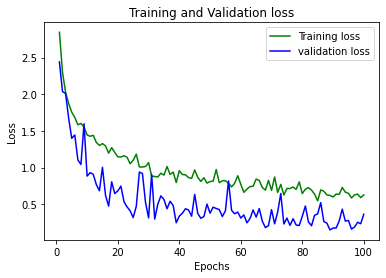

In [ ]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,initial_epochs+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

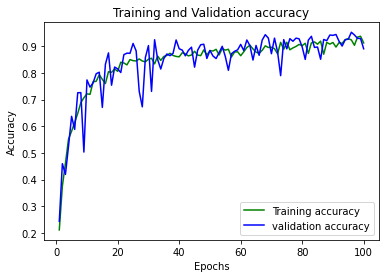

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,initial_epochs+1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
header = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

protocol_mapping = {'icmp': 0, 'tcp': 1, 'udp': 2}
service_mapping = {'IRC': 0, 'X11': 1, 'Z39_50': 2, 'auth': 3, 'bgp': 4, 'courier': 5, 'csnet_ns': 6, 'ctf': 7, 'daytime': 8, 'discard': 9, 'domain': 10, 'domain_u': 11, 'echo': 12, 'eco_i': 13, 'ecr_i': 14, 'efs': 15, 'exec': 16, 'finger': 17, 'ftp': 18, 'ftp_data': 19, 'gopher': 20, 'hostnames': 21, 'http': 22, 'http_443': 23, 'imap4': 24, 'iso_tsap': 25, 'klogin': 26, 'kshell': 27, 'ldap': 28, 'link': 29, 'login': 30, 'mtp': 31, 'name': 32, 'netbios_dgm': 33, 'netbios_ns': 34, 'netbios_ssn': 35, 'netstat': 36, 'nnsp': 37, 'nntp': 38, 'ntp_u': 39, 'other': 40, 'pm_dump': 41, 'pop_2': 42, 'pop_3': 43, 'printer': 44, 'private': 45, 'red_i': 46, 'remote_job': 47, 'rje': 48, 'shell': 49, 'smtp': 50, 'sql_net': 51, 'ssh': 52, 'sunrpc': 53, 'supdup': 54, 'systat': 55, 'telnet': 56, 'tftp_u': 57, 'tim_i': 58, 'time': 59, 'urh_i': 60, 'urp_i': 61, 'uucp': 62, 'uucp_path': 63, 'vmnet': 64, 'whois': 65}
flag_mapping = {'OTH': 0, 'REJ': 1, 'RSTO': 2, 'RSTOS0': 3, 'RSTR': 4, 'S0': 5, 'S1': 6, 'S2': 7, 'S3': 8, 'SF': 9, 'SH': 10}
label_mapping = {'back.': 0, 'buffer_overflow.': 1, 'ftp_write.': 2, 'guess_passwd.': 3, 'imap.': 4, 'ipsweep.': 5, 'land.': 6, 'loadmodule.': 7, 'multihop.': 8, 'neptune.': 9, 'nmap.': 10, 'normal.': 11, 'perl.': 12, 'phf.': 13, 'pod.': 14, 'portsweep.': 15, 'rootkit.': 16, 'satan.': 17, 'smurf.': 18, 'spy.': 19, 'teardrop.': 20, 'warezclient.': 21, 'warezmaster.': 22}

test_data = pd.read_csv('/content/drive/MyDrive/kddcup.data.corrected',names=header)

test_data['protocol_type'] = test_data['protocol_type'].map(protocol_mapping)
test_data['service'] = test_data['service'].map(service_mapping)
test_data['flag'] = test_data['flag'].map(flag_mapping)

model = load_model('/content/drive/MyDrive/IDS/kddcup99_model20210423_01DO_200EP.h5')

test_dataset = test_data.values

for data in test_dataset:
  X = data[:-1]
  y = data[-1]

  X = X.reshape(1, -1) 
  scaler = Normalizer().fit(X)
  X_norm = scaler.transform(X)

  data = np.reshape(X_norm, (X_norm.shape[0],X_norm.shape[1],1))

  prediction = np.argmax(model.predict(data), axis=-1)
  print("Prediction: " + list(label_mapping.keys())[list(label_mapping.values()).index(prediction[0])] + "\tActual:"+y)


Prediction: warezmaster.	Actual:normal.
Prediction: warezmaster.	Actual:normal.
Prediction: multihop.	Actual:normal.
Prediction: warezmaster.	Actual:normal.
Prediction: loadmodule.	Actual:normal.
Prediction: multihop.	Actual:normal.
Prediction: multihop.	Actual:normal.
Prediction: warezmaster.	Actual:normal.
Prediction: warezmaster.	Actual:normal.
Prediction: warezmaster.	Actual:normal.
Prediction: guess_passwd.	Actual:normal.
Prediction: warezmaster.	Actual:normal.
Prediction: perl.	Actual:normal.
Prediction: warezmaster.	Actual:normal.
Prediction: perl.	Actual:normal.
Prediction: rootkit.	Actual:normal.
Prediction: perl.	Actual:normal.
Prediction: rootkit.	Actual:normal.
Prediction: rootkit.	Actual:normal.
Prediction: normal.	Actual:normal.
Prediction: warezmaster.	Actual:normal.
Prediction: guess_passwd.	Actual:normal.
Prediction: buffer_overflow.	Actual:normal.
Prediction: perl.	Actual:normal.
Prediction: normal.	Actual:normal.
Prediction: normal.	Actual:normal.
Prediction: normal.

KeyboardInterrupt: ignored

https://github.com/vinayakumarr/Network-Intrusion-Detection/blob/master/KDDCup%2099/CNN/multiclass/cnn1.py